In [1]:
# 🔍 ENHANCED DATA STATUS CHECKER
# Run this cell to check what data variables are available

import pandas as pd

print("📊 CURRENT DATA STATUS CHECK")
print("=" * 40)

# Show all variables in current session
print("🔍 ALL VARIABLES IN SESSION:")
all_vars = [var for var in locals() if not var.startswith('_')]
print(f"   Available variables: {', '.join(all_vars)}")

print("\n📋 DATA VARIABLES STATUS:")

# Initialize status tracking
data_status = {}

# Check for options data
if 'df_call' in locals():
    if isinstance(df_call, pd.DataFrame) and not df_call.empty:
        print(f"✅ df_call: {df_call.shape} - {len(df_call):,} records")
        if 'Expiry' in df_call.columns:
            expiry_count = df_call['Expiry'].nunique()
            print(f"   📅 Unique expiries: {expiry_count}")
        else:
            print(f"   ⚠️ Missing 'Expiry' column. Available: {list(df_call.columns)}")
        data_status['df_call'] = True
    else:
        print(f"⚠️ df_call exists but is empty or not a DataFrame: {type(df_call)}")
        data_status['df_call'] = False
else:
    print("❌ df_call: Not loaded")
    data_status['df_call'] = False

if 'df_put' in locals():
    if isinstance(df_put, pd.DataFrame) and not df_put.empty:
        print(f"✅ df_put: {df_put.shape} - {len(df_put):,} records")
        if 'Expiry' in df_put.columns:
            expiry_count = df_put['Expiry'].nunique()
            print(f"   📅 Unique expiries: {expiry_count}")
        else:
            print(f"   ⚠️ Missing 'Expiry' column. Available: {list(df_put.columns)}")
        data_status['df_put'] = True
    else:
        print(f"⚠️ df_put exists but is empty or not a DataFrame: {type(df_put)}")
        data_status['df_put'] = False
else:
    print("❌ df_put: Not loaded")
    data_status['df_put'] = False

# Check for Bank Nifty spot data
if 'bank_nifty' in locals():
    if isinstance(bank_nifty, pd.DataFrame) and not bank_nifty.empty:
        print(f"✅ bank_nifty: {bank_nifty.shape} - {len(bank_nifty):,} records")
        if 'Date' in bank_nifty.columns:
            date_range = f"{bank_nifty['Date'].min():%d-%b-%Y} to {bank_nifty['Date'].max():%d-%b-%Y}"
            print(f"   📅 Date range: {date_range}")
        else:
            print(f"   ⚠️ Missing 'Date' column. Available: {list(bank_nifty.columns)}")
        data_status['bank_nifty'] = True
    else:
        print(f"⚠️ bank_nifty exists but is empty or not a DataFrame: {type(bank_nifty)}")
        data_status['bank_nifty'] = False
else:
    print("❌ bank_nifty: Not loaded")
    data_status['bank_nifty'] = False

print("\n🎯 NEXT STEPS:")
steps_needed = []
if not data_status.get('df_call', False) or not data_status.get('df_put', False):
    steps_needed.append("📌 Run Cell 2: Load Bank Nifty Options Data")
if not data_status.get('bank_nifty', False):
    steps_needed.append("📌 Run Cell 4: Load Bank Nifty Index Data")

if steps_needed:
    for i, step in enumerate(steps_needed, 1):
        print(f"{i}️⃣ {step}")
else:
    # Check if all required data is properly loaded
    all_loaded = all(data_status.get(var, False) for var in ['bank_nifty', 'df_call', 'df_put'])
    if all_loaded:
        print("🎉 ALL DATA LOADED SUCCESSFULLY!")
        print("✅ All required variables are available and contain data")
        print("🚀 You can now run all analysis cells (Cell 6: Spot vs Expiry Analysis)")
    else:
        print("⚠️ Some data variables have issues. Check individual status above.")

print("\n🔧 TROUBLESHOOTING:")
print("   • Make sure to run data loading cells completely (until you see success messages)")
print("   • Check for any error messages in the data loading cells")
print("   • If cells completed but variables are missing, try restarting kernel and running again")

📊 CURRENT DATA STATUS CHECK
🔍 ALL VARIABLES IN SESSION:
   Available variables: In, Out, get_ipython, exit, quit, open, pd

📋 DATA VARIABLES STATUS:
❌ df_call: Not loaded
❌ df_put: Not loaded
❌ bank_nifty: Not loaded

🎯 NEXT STEPS:
1️⃣ 📌 Run Cell 2: Load Bank Nifty Options Data
2️⃣ 📌 Run Cell 4: Load Bank Nifty Index Data

🔧 TROUBLESHOOTING:
   • Make sure to run data loading cells completely (until you see success messages)
   • Check for any error messages in the data loading cells
   • If cells completed but variables are missing, try restarting kernel and running again


In [2]:
# Load Bank Nifty Options Data using the options_data_loader module
import sys
import os

# Setup path to import custom modules
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import the options data loader
from utils.options_data_loader import load_banknifty_options_data

# Load the options data using the dedicated function
data_path = os.path.join(project_root, 'data')

try:
    df_call, df_put, options_merged = load_banknifty_options_data(data_path)
    
    # Display sample data for both CE and PE
    if not df_call.empty:
        print(f"\n🔍 CALL OPTIONS SAMPLE DATA (First 3 records):")
        print("-" * 45)
        display(df_call.head(3))
    
    if not df_put.empty:
        print(f"\n🔍 PUT OPTIONS SAMPLE DATA (First 3 records):")
        print("-" * 44)
        display(df_put.head(3))
        
except Exception as e:
    print(f"❌ Error loading options data: {str(e)}")
    # Initialize empty DataFrames in case of error
    import pandas as pd
    df_call = pd.DataFrame()
    df_put = pd.DataFrame()
    options_merged = pd.DataFrame()

📂 LOADING BANK NIFTY OPTIONS DATA
📋 Found 22 Bank Nifty options files:
  1. OPTIDX_BANKNIFTY_CE_01-Apr-2023_TO_30-Jun-2023.csv
  2. OPTIDX_BANKNIFTY_CE_01-Apr-2024_TO_30-Jun-2024.csv
  3. OPTIDX_BANKNIFTY_CE_01-Apr-2025_TO_30-Jun-2025.csv
  4. OPTIDX_BANKNIFTY_CE_01-Jan-2023_TO_31-Mar-2023.csv
  5. OPTIDX_BANKNIFTY_CE_01-Jan-2024_TO_31-Mar-2024.csv
  6. OPTIDX_BANKNIFTY_CE_01-Jan-2025_TO_31-Mar-2025.csv
  7. OPTIDX_BANKNIFTY_CE_01-Jul-2023_TO_30-Sep-2023.csv
  8. OPTIDX_BANKNIFTY_CE_01-Jul-2024_TO_30-Sep-2024.csv
  9. OPTIDX_BANKNIFTY_CE_01-Jul-2025_TO_27-Jul-2025.csv
  10. OPTIDX_BANKNIFTY_CE_01-Oct-2023_TO_31-Dec-2023.csv
  11. OPTIDX_BANKNIFTY_CE_01-Oct-2024_TO_31-Dec-2024.csv
  12. OPTIDX_BANKNIFTY_PE_01-Apr-2023_TO_30-Jun-2023.csv
  13. OPTIDX_BANKNIFTY_PE_01-Apr-2024_TO_30-Jun-2024.csv
  14. OPTIDX_BANKNIFTY_PE_01-Apr-2025_TO_30-Jun-2025.csv
  15. OPTIDX_BANKNIFTY_PE_01-Jan-2023_TO_31-Mar-2023.csv
  16. OPTIDX_BANKNIFTY_PE_01-Jan-2024_TO_31-Mar-2024.csv
  17. OPTIDX_BANKNIFTY_PE_

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Source_File
0,BANKNIFTY,2023-01-02,2023-01-05,CE,48000.0,4.05,4.25,2.70,2.95,2.70,2.95,108278.0,1299421.71,85.71,402600.0,17325.0,43203.10,OPTIDX_BANKNIFTY_CE_01-Jan-2023_TO_31-Mar-2023...
1,BANKNIFTY,2023-01-02,2023-01-05,CE,48500.0,3.35,3.70,2.55,2.70,2.65,2.70,66529.0,806713.77,49.64,183850.0,37975.0,43203.10,OPTIDX_BANKNIFTY_CE_01-Jan-2023_TO_31-Mar-2023...
2,BANKNIFTY,2023-01-02,2023-01-05,CE,42500.0,708.00,944.10,609.40,790.45,831.35,790.45,67897.0,734630.01,13224.39,220125.0,-35150.0,43203.10,OPTIDX_BANKNIFTY_CE_01-Jan-2023_TO_31-Mar-2023...



🔍 PUT OPTIONS SAMPLE DATA (First 3 records):
--------------------------------------------


,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Source_File
0,BANKNIFTY,2023-01-02,2023-01-05,PE,40000.0,6.1,7.55,4.60,4.95,4.80,4.95,367120.0,3671721.29,521.29,1507800.0,-237800.0,43203.10,OPTIDX_BANKNIFTY_PE_01-Jan-2023_TO_31-Mar-2023...
1,BANKNIFTY,2023-01-02,2023-01-05,PE,40400.0,10.0,10.00,4.85,5.70,5.75,5.70,33862.0,342062.80,56.60,79450.0,-3050.0,43203.10,OPTIDX_BANKNIFTY_PE_01-Jan-2023_TO_31-Mar-2023...
2,BANKNIFTY,2023-01-02,2023-01-05,PE,43600.0,643.8,715.00,403.25,496.90,461.55,496.90,210140.0,2316823.96,26297.96,198775.0,91475.0,43203.10,OPTIDX_BANKNIFTY_PE_01-Jan-2023_TO_31-Mar-2023...


In [3]:
# Interactive Options Data Visualization using the options_visualizer module
import sys
import os

# Setup path to import custom modules (if not already done)
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import the options visualizer
from utils.options_visualizer import create_interactive_options_visualizer

# Create and display the interactive visualizer
try:
    # Check if we have the required data variables
    if 'df_call' in locals() and 'df_put' in locals():
        visualizer = create_interactive_options_visualizer(df_call, df_put)
    else:
        print("❌ Options data not found. Please run the data loading cell first.")
        print("Looking for variables: df_call, df_put")
        
except Exception as e:
    print(f"❌ Error creating visualizer: {str(e)}")
    import traceback
    traceback.print_exc()

📊 INTERACTIVE OPTIONS DATA VISUALIZATION
📞 Call Options Available: 395,080 records
📉 Put Options Available: 395,306 records
\n🎛️ INTERACTIVE CONTROLS:
-------------------------
🎚️ Use the slider to smoothly transition between Call and Put options
   • 0.0 = Pure Call Options (CE)
   • 0.5 = Mixed Analysis
   • 1.0 = Pure Put Options (PE)


Output()

\n📈 Initial Analysis (Call Options, All Visualizations):


📂 Loading existing Bank Nifty data from file...
✅ Loaded Bank Nifty data from: bank_nifty_yfinance.csv
📋 Data Shape: (384, 6)
📅 Date Range: 02-Jan-2024 to 25-Jul-2025
📊 Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

📈 Plotting Bank Nifty Index Data (Yahoo Finance)
Using columns: ['Open', 'High', 'Low', 'Close']
Plot data shape: (384, 6)


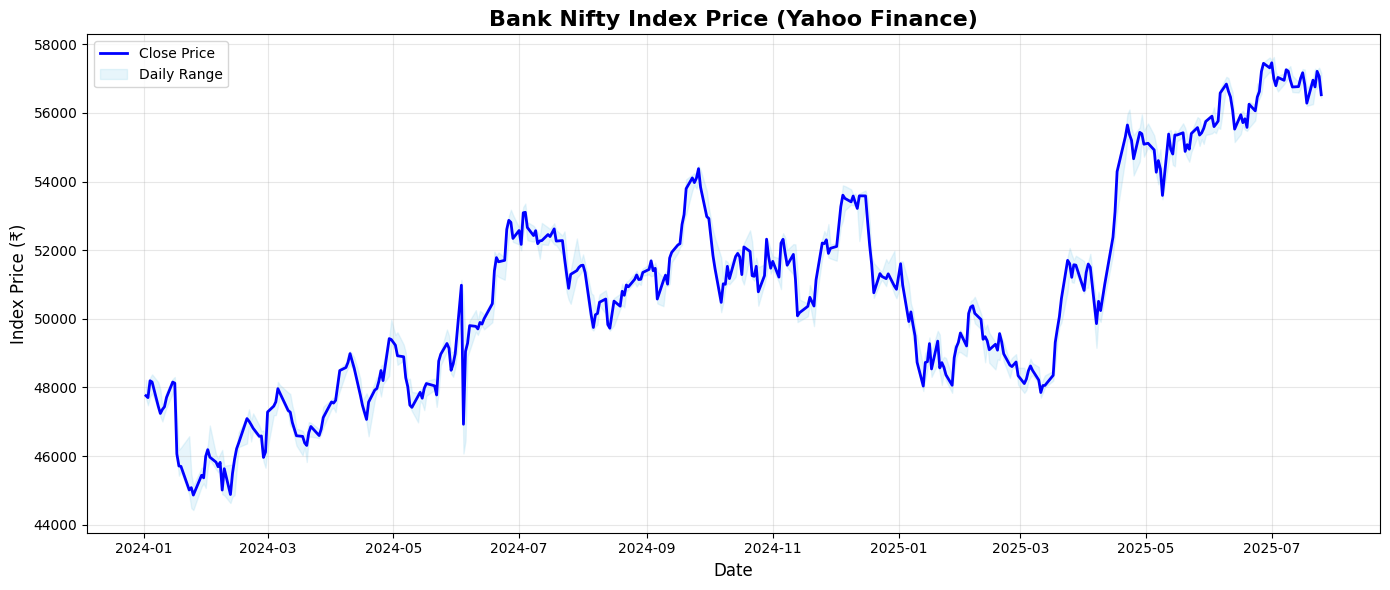


✅ Bank Nifty data loaded successfully!
📊 Final shape: (384, 6)
📋 Available for analysis in variable 'bank_nifty'


In [4]:
# Load Bank Nifty Index data using the banknifty_data_loader module
import sys
import os

# Setup path to import custom modules (if not already done)
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import the Bank Nifty data loader
from utils.banknifty_data_loader import load_banknifty_data

# Define data path
data_path = os.path.join(project_root, 'data')

# Load Bank Nifty data with automatic plotting
try:
    bank_nifty = load_banknifty_data(
        data_path=data_path,
        start_date="2024-01-01",
        end_date=None,  # Download up to current date
        force_download=False,  # Use cached data if available
        plot_data=True  # Create basic plot
    )
    
    if not bank_nifty.empty:
        print(f"\n✅ Bank Nifty data loaded successfully!")
        print(f"📊 Final shape: {bank_nifty.shape}")
        print(f"📋 Available for analysis in variable 'bank_nifty'")
    else:
        print("❌ Failed to load Bank Nifty data")
        
except Exception as e:
    print(f"❌ Error loading Bank Nifty data: {str(e)}")
    import traceback
    traceback.print_exc()
    # Initialize empty DataFrame in case of error
    import pandas as pd
    bank_nifty = pd.DataFrame()

In [5]:
# Bank Nifty Interactive Plotter using the banknifty_plotter module
import sys
import os

# Setup path to import custom modules (if not already done)
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import the Bank Nifty interactive plotter
from utils.banknifty_plotter import display_banknifty_plotter

# Create and display the interactive plotter
try:
    # Check if we have the required data variable
    if 'bank_nifty' in locals() and not bank_nifty.empty:
        # Create and display the interactive plotter
        plotter = display_banknifty_plotter(bank_nifty)
        
        # Store plotter instance for later use if needed
        print(f"\n💡 Plotter instance stored in variable 'plotter' for programmatic access")
        
    else:
        print("❌ Bank Nifty data not found. Please run the data loading cell first.")
        print("Looking for variable: bank_nifty")
        
except Exception as e:
    print(f"❌ Error creating interactive plotter: {str(e)}")
    import traceback
    traceback.print_exc()

📊 BANK NIFTY INTERACTIVE PLOTTER
✅ Available: Open, High, Low, Close
📅 Range: 02-Jan-2024 to 25-Jul-2025
📊 Records: 384

🎛️ Controls:


Output()


📈 Initial plot (Close price, full range):



💡 Plotter instance stored in variable 'plotter' for programmatic access


In [6]:
# 🚀 ENHANCED SPOT vs EXPIRY ANALYSIS - Interactive Dashboard
# This cell creates a comprehensive analysis of Bank Nifty spot prices vs options expiry patterns

import sys
import os
import pandas as pd

print("🚀 INITIALIZING ENHANCED SPOT vs EXPIRY ANALYSIS")
print("=" * 60)

# Setup module import path
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import validation utilities
try:
    from utils.market_data_validator import (
        validate_market_data,
        display_validation_summary,
        get_validation_summary_stats,
        validate_data_compatibility
    )
    print("✅ Successfully imported market data validation utilities")
except ImportError as e:
    print(f"❌ Failed to import validation utilities: {e}")
    print("🔧 Please ensure market_data_validator.py exists in src/utils/")
    raise

# Perform comprehensive data validation
print("\n" + "="*60)
validation_results = validate_market_data(bank_nifty, df_call, df_put)

# Check data compatibility for analysis
print(f"\n🔗 DATA COMPATIBILITY ANALYSIS:")
print("-" * 35)
compatibility_results = validate_data_compatibility(bank_nifty, df_call, df_put)

if compatibility_results['compatible']:
    print("✅ Data sets are compatible for analysis")
    if 'overlap' in compatibility_results['date_analysis']:
        overlap_info = compatibility_results['date_analysis']['overlap']
        print(f"   📅 Overlapping period: {overlap_info['start']:%d-%b-%Y} to {overlap_info['end']:%d-%b-%Y}")
        print(f"   📊 Analysis period: {overlap_info['days']} days")
else:
    print("⚠️ Data compatibility issues detected:")
    for issue in compatibility_results['issues']:
        print(f"   • {issue}")
    print("💡 Recommendations:")
    for rec in compatibility_results['recommendations']:
        print(f"   • {rec}")

# Display validation summary and proceed if valid
if display_validation_summary(validation_results):
    try:
        # Import the enhanced spot vs expiry analyzer
        from utils.spot_expiry_analyzer import display_spot_vs_expiry_analysis
        
        print("📈 Creating Enhanced Interactive Analysis Dashboard...")
        print("🔧 Applying automatic column mapping and data optimization...")
        
        # Prepare data with intelligent column mapping
        df_call_processed = df_call.copy()
        df_put_processed = df_put.copy()
        
        # Smart column mapping for different data formats
        column_mappings_applied = []
        
        # Handle Strike Price column mapping
        if 'Strike Price' in df_call_processed.columns and 'Strike' not in df_call_processed.columns:
            df_call_processed = df_call_processed.rename(columns={'Strike Price': 'Strike'})
            column_mappings_applied.append("Call: 'Strike Price' → 'Strike'")
        
        if 'Strike Price' in df_put_processed.columns and 'Strike' not in df_put_processed.columns:
            df_put_processed = df_put_processed.rename(columns={'Strike Price': 'Strike'})
            column_mappings_applied.append("Put: 'Strike Price' → 'Strike'")
        
        if column_mappings_applied:
            print(f"✅ Column mappings applied: {', '.join(column_mappings_applied)}")
        else:
            print("✅ Data columns already in optimal format")
        
        print("🚀 Launching Enhanced Analyzer...")
        
        # Create and display the enhanced analyzer with error handling
        try:
            analyzer = display_spot_vs_expiry_analysis(bank_nifty, df_call_processed, df_put_processed)
            
            # Show summary statistics using the utility function
            summary_stats = get_validation_summary_stats(validation_results)
            print(f"\n📈 VALIDATION SUMMARY:")
            print(f"   🚀 All Data Valid: {summary_stats['all_valid']}")
            print(f"   📅 Total Expiries: {summary_stats['total_expiries']}")
            print(f"   💰 Spot Records: {summary_stats['data_counts']['bank_nifty']:,}")
            print(f"   📞 Call Records: {summary_stats['data_counts']['df_call']:,}")
            print(f"   📉 Put Records: {summary_stats['data_counts']['df_put']:,}")
            
        except Exception as plot_error:
            print(f"⚠️ Plotting Issue Detected: {str(plot_error)}")
            print("🔧 Attempting automatic diagnosis...")
            
            # Try to handle known issues
            error_msg = str(plot_error).lower()
        
    except ImportError as ie:
        print(f"❌ Module Import Error: {str(ie)}")
        
    except Exception as e:
        print(f"❌ Enhanced Analysis Creation Error: {str(e)}")
        print("🔧 Comprehensive Error Information:")
        import traceback
        traceback.print_exc()
        
        
print(f"\n⏱️ Enhanced analysis initialization completed at {pd.Timestamp.now().strftime('%H:%M:%S')}")
print("🎯 Ready for next-generation market analysis!")

🚀 INITIALIZING ENHANCED SPOT vs EXPIRY ANALYSIS
✅ Successfully imported market data validation utilities

🔍 Enhanced Market Data Validation:
----------------------------------------
✅ Bank Nifty Spot: 384 records (02-Jan-2024 to 25-Jul-2025)
✅ Call Options: 395,080 records, 128 unique expiries
   📊 Strike column: 'Strike Price' | Strike range: ₹25,500 - ₹65,000
✅ Put Options: 395,306 records, 128 unique expiries
   📊 Strike column: 'Strike Price' | Strike range: ₹25,500 - ₹65,000

📅 EXPIRY DATES ANALYSIS:
-------------------------
   🎯 Total unique expiries: 128
   📅 Expiry range: 05-Jan-2023 to 30-Jun-2026
   📋 Available expiries:
      05-Jan-2023: 308 calls, 308 puts
      12-Jan-2023: 693 calls, 693 puts
      19-Jan-2023: 1008 calls, 1008 puts
      25-Jan-2023: 1926 calls, 1926 puts
      02-Feb-2023: 1728 calls, 1728 puts
      09-Feb-2023: 1657 calls, 1657 puts
      16-Feb-2023: 1783 calls, 1783 puts
      23-Feb-2023: 3286 calls, 3286 puts
      02-Mar-2023: 2342 calls, 2342 

HTML(value='<b>📊 Ready for analysis</b>')

Output()


📈 Running initial analysis...



📈 VALIDATION SUMMARY:
   🚀 All Data Valid: True
   📅 Total Expiries: 128
   💰 Spot Records: 384
   📞 Call Records: 395,080
   📉 Put Records: 395,306

⏱️ Enhanced analysis initialization completed at 21:18:40
🎯 Ready for next-generation market analysis!


In [7]:
#!pip install kiteconnect
from kiteconnect import KiteConnect
import pandas as pd
import os

# Load API key and access token from environment variables for security
api_key = "v2qa0jwrkw1l7489"
access_token = "17b9qraamiojz39sj7xa0hkaoqctf7fu"

kite = KiteConnect(api_key=api_key)
kite.set_access_token(access_token)

# Example: Fetch option chain for Bank Nifty (replace with your instrument_token if needed)
# Get instruments list and filter for Bank Nifty options
instruments = kite.instruments(exchange="NFO")
banknifty_options = [inst for inst in instruments if inst['name'] == 'BANKNIFTY' and inst['segment'] == 'NFO-OPT']

# Create DataFrame for tabular display
option_chain_df = pd.DataFrame(banknifty_options)

# Display relevant columns
display_columns = ['tradingsymbol', 'strike', 'expiry', 'instrument_type', 'lot_size', 'tick_size']
print("Bank Nifty Option Chain (Zerodha Kite):")
display(option_chain_df[display_columns].head(20))

Bank Nifty Option Chain (Zerodha Kite):


,tradingsymbol,strike,expiry,instrument_type,lot_size,tick_size
0,BANKNIFTY25JUL56500CE,56500.0,2025-07-31,CE,35,0.05
1,BANKNIFTY25JUL56500PE,56500.0,2025-07-31,PE,35,0.05
2,BANKNIFTY25JUL56600CE,56600.0,2025-07-31,CE,35,0.05
3,BANKNIFTY25JUL56600PE,56600.0,2025-07-31,PE,35,0.05
4,BANKNIFTY25JUL56400CE,56400.0,2025-07-31,CE,35,0.05
5,BANKNIFTY25JUL56400PE,56400.0,2025-07-31,PE,35,0.05
6,BANKNIFTY25JUL56700CE,56700.0,2025-07-31,CE,35,0.05
7,BANKNIFTY25JUL56700PE,56700.0,2025-07-31,PE,35,0.05
8,BANKNIFTY25JUL56300CE,56300.0,2025-07-31,CE,35,0.05
9,BANKNIFTY25JUL56300PE,56300.0,2025-07-31,PE,35,0.05


In [10]:
# Interactive Option Chain Table - CE/PE Side by Side
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display


print("🔄 INTERACTIVE OPTION CHAIN TABLE")
print("=" * 40)

if not option_chain_df.empty:
    # Create expiry dropdown for filtering
    available_expiries = sorted(option_chain_df['expiry'].unique())
    expiry_filter = widgets.Dropdown(
        options=['All Expiries'] + [str(exp) for exp in available_expiries],
        value='All Expiries',
        description='Select Expiry:',
        style={'description_width': 'initial'},
        layout={'width': '300px'}
    )
    
    # Strike range slider
    min_strike = option_chain_df['strike'].min()
    max_strike = option_chain_df['strike'].max()
    strike_range = widgets.IntRangeSlider(
        value=[min_strike, min_strike + 2000],  # Default to show 2000 points range
        min=min_strike,
        max=max_strike,
        step=50,
        description='Strike Range:',
        style={'description_width': 'initial'},
        layout={'width': '400px'}
    )
    
    def create_option_chain_table(selected_expiry, strike_range_val):
        # Filter data based on selections
        filtered_data = option_chain_df.copy()
        
        if selected_expiry != 'All Expiries':
            filtered_data = filtered_data[filtered_data['expiry'] == selected_expiry]
        
        # Filter by strike range
        min_strike, max_strike = strike_range_val
        filtered_data = filtered_data[
            (filtered_data['strike'] >= min_strike) & 
            (filtered_data['strike'] <= max_strike)
        ]
        
        if filtered_data.empty:
            print("❌ No data available for selected filters")
            return
        
        # Separate CE and PE options
        ce_options = filtered_data[filtered_data['instrument_type'] == 'CE'].copy()
        pe_options = filtered_data[filtered_data['instrument_type'] == 'PE'].copy()
        
        # Prepare CE data
        ce_display = ce_options[['strike', 'tradingsymbol', 'expiry', 'lot_size']].copy()
        ce_display.columns = ['Strike', 'CE_Symbol', 'CE_Expiry', 'CE_LotSize']
        
        # Prepare PE data  
        pe_display = pe_options[['strike', 'tradingsymbol', 'expiry', 'lot_size']].copy()
        pe_display.columns = ['Strike', 'PE_Symbol', 'PE_Expiry', 'PE_LotSize']
        
        # Merge CE and PE on strike price
        option_chain_combined = pd.merge(
            ce_display, pe_display, 
            on='Strike', 
            how='outer',
            suffixes=('_CE', '_PE')
        ).fillna('-')
        
        # Sort by strike price
        option_chain_combined = option_chain_combined.sort_values('Strike')
        
        # Format for better display
        option_chain_combined['Strike'] = option_chain_combined['Strike'].apply(lambda x: f"₹{x:,.0f}")
        
        # Reorder columns for better layout
        display_columns = [
            'CE_Symbol', 'CE_LotSize', 'Strike', 'PE_LotSize', 'PE_Symbol'
        ]
        
        final_display = option_chain_combined[display_columns].copy()
        final_display.columns = [
            'Call Symbol', 'Call Lot Size', 'Strike Price', 'Put Lot Size', 'Put Symbol'
        ]
        
        # Display statistics
        total_strikes = len(option_chain_combined)
        ce_count = len(ce_options)
        pe_count = len(pe_options)
        
        print(f"📊 FILTERED RESULTS:")
        print(f"🎯 Strikes Displayed: {total_strikes}")
        print(f"📞 Call Options: {ce_count}")
        print(f"📉 Put Options: {pe_count}")
        
        if selected_expiry != 'All Expiries':
            print(f"📅 Expiry: {selected_expiry}")
        else:
            expiry_count = filtered_data['expiry'].nunique()
            print(f"📅 Expiries Included: {expiry_count}")
        
        print(f"💰 Strike Range: ₹{min_strike:,} - ₹{max_strike:,}")
        print("\n" + "="*80)
        
        # Set pandas display options for better table formatting
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        pd.set_option('display.max_colwidth', 25)
        
        # Display the table
        print("\n📋 OPTION CHAIN TABLE (CE/PE Side by Side):")
        print("-" * 80)
        display(final_display)
        
        # Show expiry breakdown if showing all expiries
        if selected_expiry == 'All Expiries' and not filtered_data.empty:
            print(f"\n📊 EXPIRY BREAKDOWN:")
            print("-" * 25)
            expiry_breakdown = filtered_data.groupby(['expiry', 'instrument_type']).size().unstack(fill_value=0)
            expiry_breakdown['Total'] = expiry_breakdown.sum(axis=1)
            display(expiry_breakdown)
    
    # Create interactive interface
    print("🎛️ FILTER CONTROLS:")
    print("-" * 20)
    interact(create_option_chain_table, 
             selected_expiry=expiry_filter, 
             strike_range_val=strike_range)
    
else:
    print("❌ No option chain data available from Kite API")
    print("Please check your API connection and credentials")

🔄 INTERACTIVE OPTION CHAIN TABLE
🎛️ FILTER CONTROLS:
--------------------


interactive(children=(Dropdown(description='Select Expiry:', layout=Layout(width='300px'), options=('All Expir…